<h1>Projeto Análise de Dados Netflix</h1>
<a href='https://www.linkedin.com/in/henrique-silva-costa-j%C3%BAnior-272261180/'>Henrique Silva Costa Júnior</a>
<p>henriquesilvacostajr@gmail.com</p>
<img src="https://help.nflxext.com/43e0db2f-fea0-4308-bfb9-09f2a88f6ee4_what_is_netflix_1_en.png">
<br>
<p>A Netflix é um serviço de streaming baseado em assinatura que permite que nossos membros assistam a programas de TV e filmes em um dispositivo conectado à Internet. Nesse projeto iremos limpar, analisar e comparar dados da base Netflix apenas para fins didáticos aprimorando técnicas de ciência e engenharia de dados, utilizando a biblioteca Pandas do Python.</p>

<h1>Sobre o Dataset</h1>
O dataset Netflix tem informações de filmes e shows de TV disponíveis até 2022.<br>
O mesmo foi coletado no Kaggle, que consome uma ferramenta terceirizada de busca do Netflix (Flixable).


In [221]:
# Importando o dataset
import pandas as pd
data = pd.read_csv(r'netflix_dataset.csv')


In [110]:
data # Dataset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


<h3>Algumas informações básicas da tabela...</h3>

In [113]:
data.columns # Mostra o nome de cada coluna.

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [134]:
data.info() # Mostra os índices, colunas, o tipo de dados (data-type) de cada coluna e a memória usada.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Show_Id        7787 non-null   object        
 1   Category       7787 non-null   object        
 2   Title          7787 non-null   object        
 3   Director       5399 non-null   object        
 4   Cast           7069 non-null   object        
 5   Country        7280 non-null   object        
 6   Release_Date   7777 non-null   object        
 7   Rating         7780 non-null   object        
 8   Duration       7787 non-null   object        
 9   Type           7787 non-null   object        
 10  Description    7787 non-null   object        
 11  Date_Formated  7777 non-null   datetime64[ns]
 12  Year           7777 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 851.7+ KB


<h4>Variáveis</h4>
<ul>
    <li><var>Show_id</var> - Identificação única do documento</li>
    <li><var>Category</var> - Categoria (Filme ou TV show)</li>
    <li><var>Title</var> - Título</li>
    <li><var>Director</var> - Diretor</li>
    <li><var>Cast</var> - Elenco</li>
    <li><var>Country</var> - País de origem</li>
    <li><var>Release_Date</var> - Data da realização</li>
    <li><var>Rating</var> - Avaliação</li>
    <li><var>Durantion</var> - Duração do filme ou show</li>
    <li><var>Type</var> - Tipo (Ação, Terror...)</li>
    <li><var>Description</var> - Descrição</li>


<h2>Limpeza dos dados</h2>
<h4>Duplicação</h4>
Antes da análise dos dados, iremos limpá-los minimamente para garantir a veracidade dos mesmos.<br>
Primeiro iremos tirar qualquer dado duplicado indevidamente.

In [115]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Length: 7789, dtype: bool

Essa função retorna uma série booleana denotando linhas duplicadas ou não (True or False).
Contudo, para mostrar apenas as linhas duplicadas, colocaremos a série como índices na lista data
que retornará apenas os valores True da série (duplicados).

In [116]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [117]:
data.drop_duplicates(inplace= True) # Remove as linhas duplicadas permanentemente.

In [118]:
data[data.duplicated()] # Checando se de fato foram removidas.

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


<h4>Valores Null</h4>
<p>Iremos descobrir se tem algum valor nulo no dataset.
Caso afirmativo, iremos mostrar em um gráfico do tipo Heat-map.</p>

In [119]:
data.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


In [120]:
data.isnull().sum() # Mostra a soma de valores nulos por coluna.

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

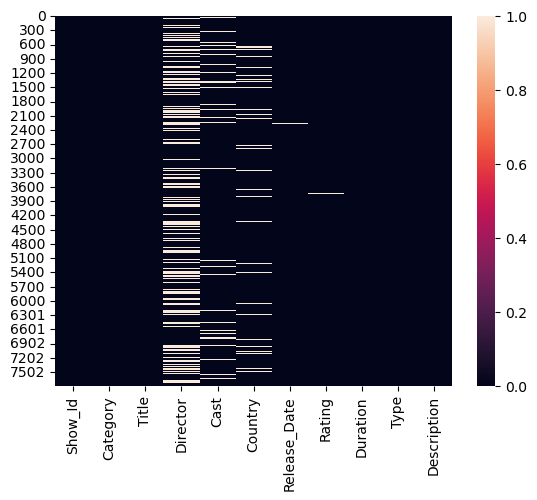

In [121]:
import seaborn as sns # Importando a biblioteca seaborn para mostrar os valores null com heat-map
sns.heatmap(data.isnull())

<p>Os traços na cor branca demonstram a frequência de valores Null, sendo mais presentes nas colunas Director, Cast e Country. <br>
Para limparmos esses campos com valores nulos, utilizaremos a função <var>dropna()</var>.</p>


In [122]:
data_no_null = data.dropna()

<p>Essa omissão dos dados em tais colunas deve ser considerada em análises mais profundas, pois ocorre a exclusão da linha por completo, podendo influenciar em alguns resultados. Logo, é aconselhável a limpeza de Null e NaN apenas em casos específicos.</p>

In [123]:
data_no_null.isna().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

<h2>Primeiras análises</h2>

Inicialmente, identificaremos a diferença em quantidade de filmes e shows de TV, plotando em um gráfico para melhor visualização.

In [124]:
data.groupby('Category').Category.count() # Agrupa todos os items de uma coluna e mostra a quantidade de cada.

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

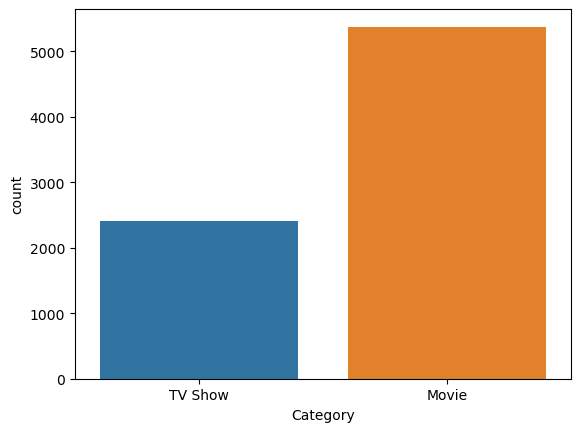

In [125]:
sns.countplot(x=data['Category'])

<h3>Faremos um filtro de todos os filmes estreiados no ano de 2021.</h3>
<p>Primeiro faremos uma nova coluna com a data formatada (datetime format) e em seguida criaremos uma coluna apenas com o ano (atributo year).</p>

In [223]:
data['Date_Formated'] = pd.to_datetime(data['Release_Date']) # Criando uma coluna com a data formatada.
data['Year'] = data['Date_Formated'].dt.year # Criando uma nova coluna apenas com o ano de realização do filme.
data [(data['Category'] == 'Movie') & (data['Year'] == 2021)] # Filtrando as duas condições iniciais: Ser filme de 2021.

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Formated,Year
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m...",2021-01-07,2021.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,"January 1, 2021",R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...,2021-01-01,2021.0
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States","January 16, 2021",PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021-01-16,2021.0
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,"January 12, 2021",TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021-01-12,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States","January 1, 2021",PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...,2021-01-01,2021.0
7553,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",2021-01-01,2021.0
7571,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,"January 15, 2021",TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali...",2021-01-15,2021.0
7572,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",PG-13,118 min,"Classic Movies, Dramas, Independent Movies","In a backwater Iowa town, young Gilbert is tor...",2021-01-01,2021.0


<h3>Agora, analisaremos os títulos de todos os filmes realizados no Brasil.</h3>
<img src='https://cdn.tellimer.com/articles/hero-h0XfX9aFaZsqhvtd2LtWiH5BCbkfarzAG7qWeMAv.jpeg' style='width:600px;height:200px;'>
<p>Basta fazermos um filtro similar ao feitor anteriormente, porém alterando o valor dos indices, que agora será o país (Country).</p>

In [127]:
data[(data['Category'] == 'Movie') & (data['Country'] == 'Brazil')]['Title'] # Na posição 'Title', pois queremos apenas os títulos de filmes BR.

208                                      A new Capitalism
320                             Afonso Padilha: Classless
394                                          Alice Junior
421                             All The Reasons To Forget
499                                         Ana e Vitória
674                                        Back and Forth
1066                                    Boy and the World
1126                                              Buddies
1294                            Chatô: The King of Brazil
1401                          City of God: 10 Years Later
1510                                   Couples Counseling
1786                                        DJ Cinderella
1832                                           Double Dad
1925    Edmilson Filho: Notas, Comedy about Relationships
1989            Emicida: AmarElo - It’s All For Yesterday
2144                  Felipe Neto: My Life Makes No Sense
2192                               Fishtronaut: The Movie
2239          

<p>Quantidade de produções brasileiras:</p>

In [291]:
data[(data['Category'] == 'Movie') & (data['Country'] == 'Brazil')]['Country'].value_counts()

Brazil    46
Name: Country, dtype: int64

<h3>A seguir analisaremos o contexto de produções referente a todos os países, vizualidos melhor em um gráfico de pizza.</h3>

<Axes: title={'center': 'País x Qtd. Produções'}, ylabel='Country'>

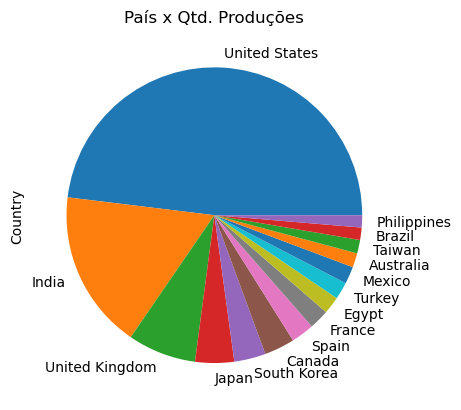

In [214]:
data['Country'].value_counts().head(15).plot.pie(title='País x Qtd. Produções') # Plotagem do gráfico para melhor visualização.



<h3>Nossa próxima verificação será a respeito dos diretores.</h3>
<p>Quantidade de produção feita por cada um dos 10 que mais produziram.</p>

In [128]:
data['Director'].value_counts().head(10) # Função de agregação (count) agrupado pelos diretores.

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

<Axes: title={'center': 'Qtd. Produções x Diretor'}>

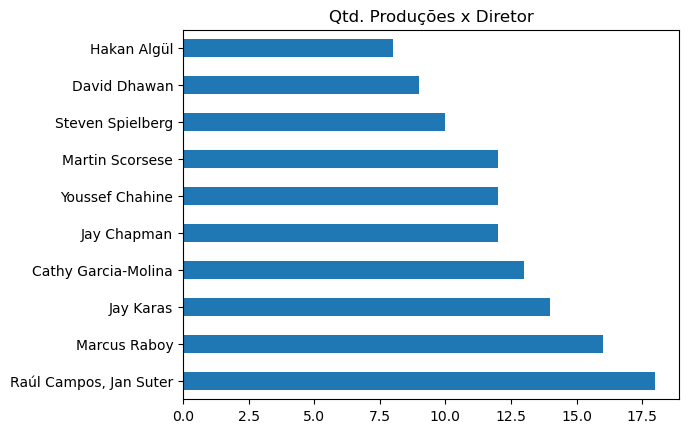

In [213]:
data['Director'].value_counts().head(10).plot.barh(title='Qtd. Produções x Diretor') # Plotagem do gráfico para melhor visualização.



<h3>Que tal filtrar os filmes cujo Tom Cruise atuou?!</h3>
<img src="https://cdn.ome.lt/AibUD7kSrT2lgdLmqloeXCZQf5k=/570x0/smart/uploads/conteudo/fotos/tom-cruise-heroi-hollywood-capa.jpg">
<p>Essa será nossa próxima verificação. Será necessário utilizar outro método de filtragem, pois o elenco possui várias pessoas, sendo necessáro então a utilização da função <var>str.contains()</var>.</p>


In [133]:
data_no_null[data_no_null['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


<p>Esse foi um caso com necessidade de utilizar o dataset sem os valores null/NaN.</p>

<h3>Os filmes com a maior e a menor duração:</h3>

In [155]:
data.Duration.unique() # Duração de cada filme ou TV show.

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

<p>Teremos que separar o número de sua unidade.</p>
<p>Para o valor máximo, não será necessário separa os filmes dos TV show's, pois não teremos nenhum TV show com mais temporadas que a quantidade de minutos.</p>

In [224]:
data[['Minutes','Unit']] = data.Duration.str.split(' ', expand=True) # Separando a string em duas (tempo e unidade).
data['Minutes'] = data['Minutes'].astype(str).astype(int) # Convertendo um pandas object para uma string e em seguinda em um inteiro.
max_duration = data.Minutes.max() # Buscando o Valor máximo de duração.
data[data['Minutes'] == max_duration] # Mostrando o filme com maior duração.

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Formated,Year,Minutes,Unit
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,2018.0,312,min


<p>Logo, para encontrarmos o filme com menor duração, será necessário separar filmes de TV show's.</p>

In [225]:
data_movies = data[data['Category'] == 'Movie'] # Filtrando apenas os que são filmes.
data_movies.head(3) # Cabeçalho do dataset apenas com filmes.


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Formated,Year,Minutes,Unit
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,80,min


In [179]:
data_movies[data_movies['Minutes'] == data_movies.Minutes.min()] # Mostrando aquele com o menor tempo de duração.


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Formated,Year,Minutes,Unit
5606,s5606,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019-06-04,2019.0,3,min


<h3>Ordenação pelo ano publicado</h3>
<p>Iremos ordenar os filmes e TV show's pelos seus anos de produção de forma decrescente, ou seja, do mais recente para o mais antigo.</p>

In [231]:
# Faremos a mesma formatação de data para o dataset "limpo", sem valores nulos.
data_no_null['Date_Formated'] = pd.to_datetime(data_no_null['Release_Date']) # Criando uma coluna com a data formatada.
data_no_null['Year'] = data_no_null['Date_Formated'].dt.year # Criando uma nova coluna apenas com o ano de realização do filme.
data_no_null.sort_values(by= 'Year', ascending= False) 

C:\Users\henri\AppData\Local\Temp\ipykernel_30072\2669613700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null['Date_Formated'] = pd.to_datetime(data_no_null['Release_Date']) # Criando uma coluna com a data formatada.
C:\Users\henri\AppData\Local\Temp\ipykernel_30072\2669613700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null['Year'] = data_no_null['Date_Formated'].dt.year # Criando uma nova coluna apenas com o ano de realização do filme.


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Formated,Year
2269,s2270,Movie,Fred Claus,David Dobkin,"Vince Vaughn, Paul Giamatti, John Michael Higg...",United States,"January 1, 2021",PG,115 min,"Children & Family Movies, Comedies",The holiday season is ruined for Santa Claus w...,2021-01-01,2021
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,"January 8, 2021",TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021
6248,s6248,Movie,The Creative Brain,"Jennifer Beamish, Toby Trackman",David Eagleman,United States,"January 1, 2021",TV-14,53 min,Documentaries,Neuroscientist David Eagleman taps into the cr...,2021-01-01,2021
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand","January 16, 2021",R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",2021-01-16,2021
7147,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,"January 6, 2021",TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...,2021-01-06,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,2011-05-17,2011
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009


<h3>Filmes de Comédia e tipos em geral</h3>
<p>Por último, iremos filtrar um dataset com os filmes de comédia e criaremos um gráfico mostrando todas as categorias para melhor comparação.</p>

In [235]:
data[(data['Category'] == 'Movie') & (data['Type'] == 'Comedies')] # Seleciona filmes de comédia.
# data[(data['Category'] == 'Movie') & (data['Type'].str.contains('Comedies'))] # Filmes que contém comédia.

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Formated,Year,Minutes,Unit
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0,99,min
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0,102,min
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019.0,93,min
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14,2020.0,104,min
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26,2018.0,102,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,"November 5, 2019",R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019-11-05,2019.0,85,min
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018-01-22,2018.0,86,min
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017-05-13,2017.0,86,min
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10,2019.0,104,min


<h3>O sistema de categorização da Netflix permite agrupar mais de uma categoria para o mesmo filme, logo utilizaremos de duas formas para fazermos a análise.</h3>
<p>A primeira, vamos comparar com os dados aninhados, conforme a categorização netflix.</p>

<Axes: title={'center': 'Categoria x Qtd. Produções'}>

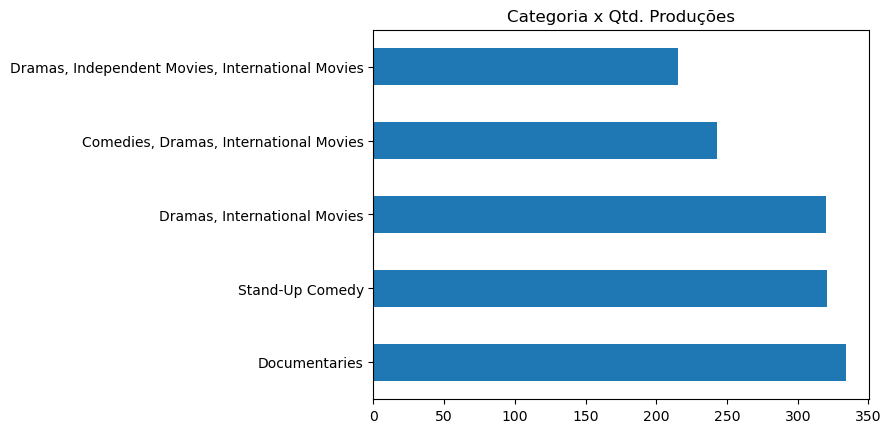

In [249]:
data['Type'].value_counts().head(5).plot.barh(title='Categoria x Qtd. Produções')

<p>Em seguida, levei em consideração, para aquelas que tem duas categorias ou mais, apenas a primeira categoria, supondo ser a mais relevante.</p>

<Axes: title={'center': 'Categoria x Qtd. Produções'}>

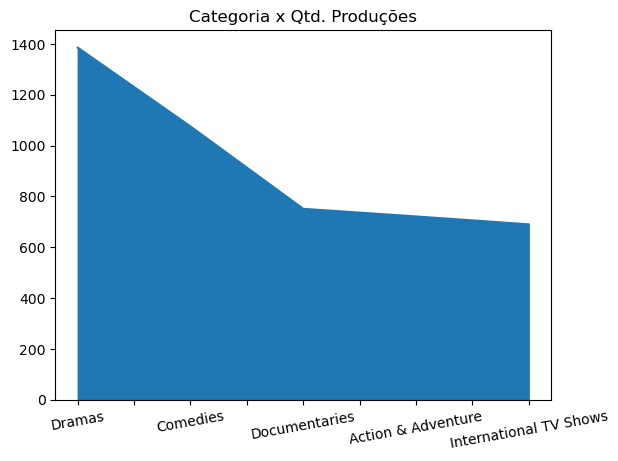

In [288]:
first_data_type = data['Type'].str.split(',', expand=True)[0] # Separa apenas a primeira categoria das linhas que possuem duas ou mais categorias.
first_data_type.value_counts().head(5).plot.area(title='Categoria x Qtd. Produções', rot=10)


<h3>Conclusão</h3>
<p>A Netflix disponibiliza um banco de dados bastante rico, porém é necessário algumas técnicas de manipulação para extrair informações simples e confiáveis. Algumas análises obtidas foram que os os valores nulos se encontram mais presentes nas colunas dos diretores, elenco e país. Além disso, temos uma maior quantidade de filmes quando comparados a TV show's (quase o dobro), refletido na preferência da conteúdo no público da empresa.</p>
<p>Apesar de o Brasil ter uma quantidade interessante de produções na plataforma (46 unidades), ainda fica muito atrás dos países com mais produções que são Estados Unidos-que detém quase metade das produções de toda Netflix-, India e União Europeia.</p>
<p>Os diretores com mais produções se encontram com certa equiparidade, demonstrando que não há um monopólio nas direções tendo em vista a grande quantidade de produto.</p>
<p>Por fim, com base em nossa análise, a categoria Drama é a mais presente na plataforma, seguida de comédia e documentários, não diferindo na análise com as categorias aninhadas.</p>
<p>Venho resaltar que esse projeto tem fins apenas didáticos para aprimoramento em ciência e engenharia de dados. Grato!</p>
<a href='https://www.linkedin.com/in/henrique-silva-costa-j%C3%BAnior-272261180/'>Henrique Silva Costa Júnior</a>
<p>henriquesilvacostajr@gmail.com</p>
